# Домашнее задание к лекции «Алгоритмы кластеризации»

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('geo_comment.xlsx')  

data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     70382 non-null  int64  
 1   x              70382 non-null  float64
 2   y              70382 non-null  float64
 3   comment_class  70382 non-null  int64  
 4   multiplier     70382 non-null  int64  
 5   comment        70382 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


### Обязательное задание

- визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
- аналогично исследовать скопления голосов за и против отдельно
- подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

Для обязательного задания будем использовать только числовые столбцы, предварительно скалируем их

In [4]:
df = data[['x', 'y', 'comment_class', 'multiplier']]

df.head()

,x,y,comment_class,multiplier
0,37.612416,55.777454,-1,1
1,37.612416,55.777454,-1,1
2,37.603298,55.742108,-1,1
3,37.558526,55.728758,-1,1
4,37.566431,55.731794,-1,1


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,x,y,comment_class,multiplier
0,0.173634,-0.129236,-0.449492,-0.032139
1,0.173634,-0.129236,-0.449492,-0.032139
2,0.107665,-0.662964,-0.449492,-0.032139
3,-0.216262,-0.864550,-0.449492,-0.032139
4,-0.159069,-0.818706,-0.449492,-0.032139


In [6]:
df_scaled.comment_class.value_counts()

-0.449492    58552
 2.224736    11830
Name: comment_class, dtype: int64

#### 1. визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [7]:
X = df_scaled[['x', 'y']]

Для начала возьмём 3 алгоритма кластеризации, для KMeans и AgglomerativeClustering поставим n_clusters=10 и посмотрим на результат

In [9]:
algorithms = [
    KMeans(n_clusters=10),
    AgglomerativeClustering(n_clusters=10),
    DBSCAN(),
]

In [10]:
clusters_random = np.random.randint(low=0, high=10, size=len(X))

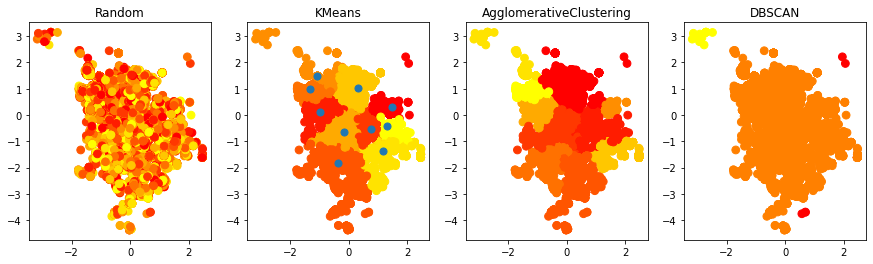

In [21]:
# random оставила для красоты :)

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes[0].scatter(X.x, X.y, c=clusters_random, cmap='autumn', s=60)
axes[0].set_title("Random")
for ax, algorithm in zip(axes[1:], algorithms):

    clusters = algorithm.fit_predict(X)
    ax.scatter(X.x, X.y, c=clusters, cmap='autumn', s=60)
    ax.set_title(algorithm.__class__.__name__)
    
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

Визуально неплохие результаты даёт KMeans и AgglomerativeClustering. Теперь попробуем подобрать кол-во кластеров для KMeans. Сначала перебором

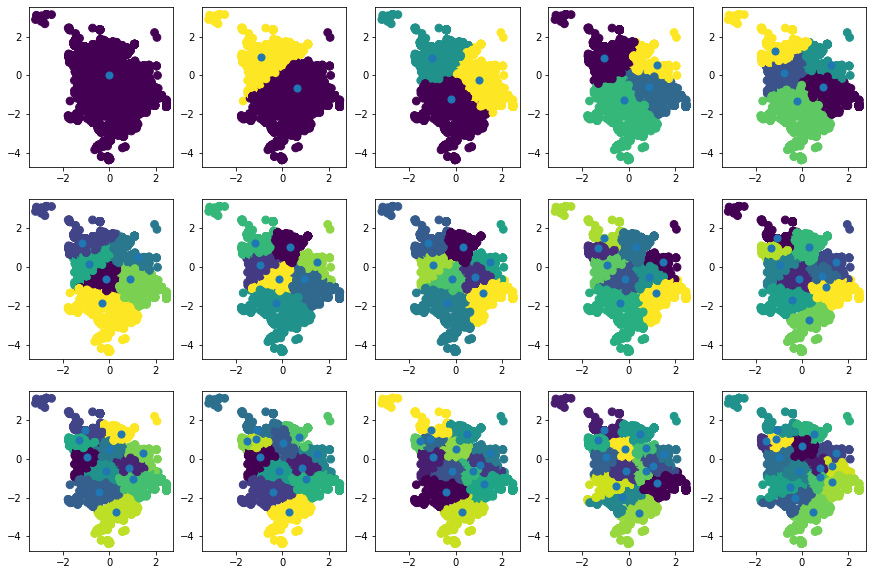

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for i, row in enumerate(axes):
    for j, ax in enumerate(row): 
        algorithm = KMeans(n_clusters=j+1+i*5)
        clusters = algorithm.fit_predict(X)
        ax.scatter(X.x, X.y, c=clusters, s=60)
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

Сложно сказать, где здесь лучший вариант, попробуем подобрать через инерцию

#### 3. подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [12]:
def optimal_clasters(X, min_n=1, max_n=16):
    k_inertia = []
    ks = range(1, 16)

    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(X, )
        k_inertia.append(clf_kmeans.inertia_)

    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    plt.plot(ks[1:-1], diff_r)
    
    k_opt = ks[np.argmin(diff_r)+1]
    
    return k_opt

2

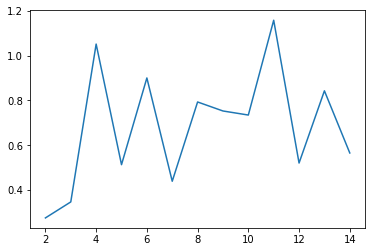

In [13]:
optimal_clasters(X)

Визуально мне кажется, что 2 кластера это не лучший вариант разбиения, я бы выбрала 7

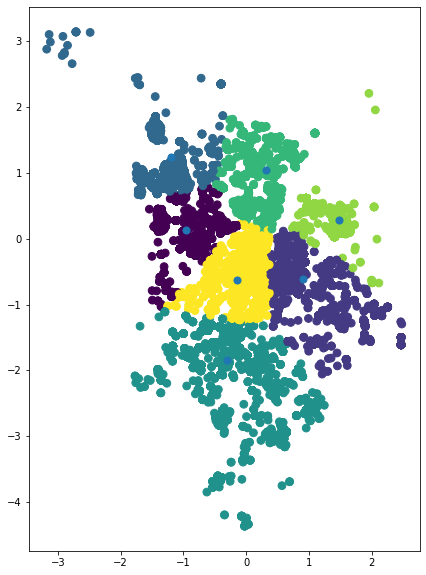

In [14]:
fig, axes = plt.subplots(figsize=(7, 10))

algorithm = KMeans(n_clusters=7)
clusters = algorithm.fit_predict(X)
axes.scatter(X.x, X.y, c=clusters, s=60)
centers = algorithm.cluster_centers_
axes.scatter(centers[:, 0], centers[:, 1], s=50)

#### 2. аналогично исследовать скопления голосов за и против отдельно

Здесь уже будем использовать только KMeans

In [15]:
X_pos = df_scaled[df_scaled['comment_class'] > 0][['x', 'y']]
X_neg = df_scaled[df_scaled['comment_class'] < 0][['x', 'y']]

Text(0.5, 1.0, 'Negative')

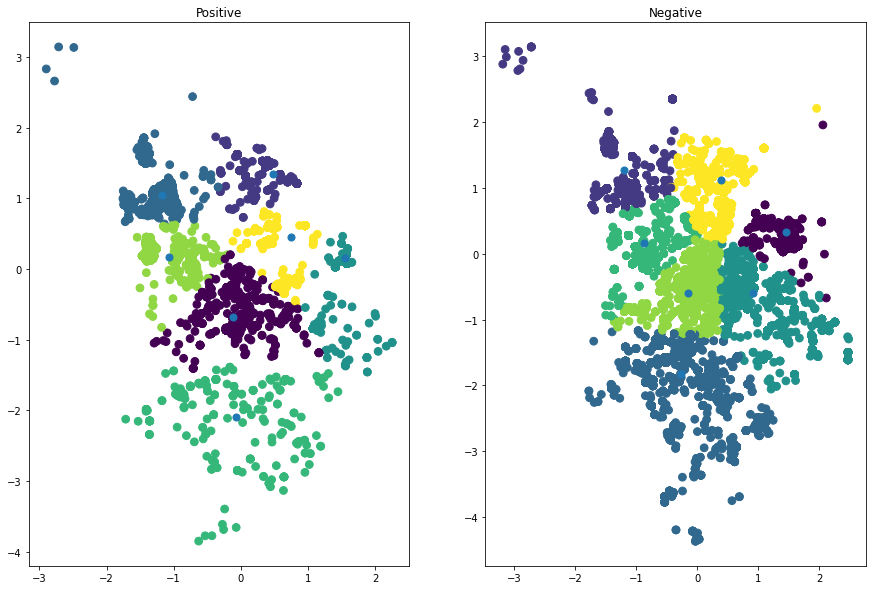

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

algorithm_pos = KMeans(n_clusters=7)
clusters_pos = algorithm_pos.fit_predict(X_pos)
axes[0].scatter(X_pos.x, X_pos.y, c=clusters_pos, s=60)
centers_pos = algorithm_pos.cluster_centers_
axes[0].scatter(centers_pos[:, 0], centers_pos[:, 1], s=50)

algorithm_neg = KMeans(n_clusters=7)
clusters_neg = algorithm_neg.fit_predict(X_neg)
axes[1].scatter(X_neg.x, X_neg.y, c=clusters_neg, s=60)
centers_neg = algorithm_neg.cluster_centers_
axes[1].scatter(centers_neg[:, 0], centers_neg[:, 1], s=50)

axes[0].set_title("Positive")
axes[1].set_title("Negative")

Попробуем здесь также подобрать кол-во кластеров

3

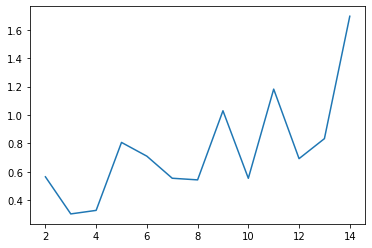

In [17]:
optimal_clasters(X_pos)

2

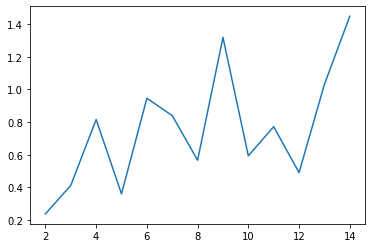

In [18]:
optimal_clasters(X_neg)

По этим рассчётам оптимальное кол-во кластеров для голосов "за" - 3, "против" - 2